# **Análise dos Dados de Partidas de Futebol**

## Objetivo 

Os dados de partidas de futebol oferecem um grande potencial para compreender o desempenho dos times e os fatores que influenciam o resultado dos jogos. O objetivo deste projeto é analisar esses dados de forma exploratória, tratando valores ausentes de maneira cuidadosa para preservar suas características originais a fim de desenvolver um modelo preditivo.

## Obtenção dos dados

In [157]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:

# Lendo o arquivo 
df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

- **Chutes a gol 1 / 2**: Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2.
- **Impedimentos 1 / 2**: Quantas vezes cada time foi pego em posição de impedimento.
- **Escanteios 1 / 2**: Total de cobranças de escanteio a favor de cada equipe.
- **Chutes fora 1 / 2**: Finalizações que não foram na direção do gol (para fora) de cada time.
- **Faltas 1 / 2**: Quantas faltas cada time cometeu durante a partida.
- **Cartões amarelos 1 / 2**: Quantos cartões amarelos foram mostrados a jogadores de cada time.
- **Cartões vermelhos 1 / 2**: Quantos cartões vermelhos foram mostrados a jogadores de cada time.
- **Cruzamentos 1 / 2**: Número de passes laterais elevados (cruzamentos) realizados por cada equipe.
- **Laterais 1 / 2**: Quantas vezes cada time executou arremessos laterais.
- **Chutes bloqueados 1 / 2**: Finalizações de cada time que foram bloqueadas por defensores adversários.
- **Contra-ataques 1 / 2**: Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.
- **Gols 1 / 2**: Número de gols marcados por cada time.
- **Tiro de meta 1 / 2**: Quantos arremessos de meta (goal kicks) cada time cobrou.
- **Tratamentos 1 / 2**: Quantas vezes jogadores de cada time receberam atendimento médico em campo.
- **Substituições 1 / 2**: Número de trocas de jogadores realizadas por cada equipe.
- **Tiros-livres 1 / 2**: Quantas cobranças de falta (tiros livres) cada time teve.
- **Defesas difíceis 1 / 2**: Número de defesas de alta dificuldade feitas pelos goleiros de cada time.
- **Posse 1 / 2 (%)**: Percentual de tempo de posse de bola de cada equipe ao longo da partida.
- **Time 1 / 2**: Nome do time da casa (1) e do time visitante (2).
- **Position 1 / 2**: Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).

Vamos dar uma olhada nas primeiras linhas do Dataframe.


In [20]:
#Primeiras 5 linhas 
df.head()

,Chutes a gol 1,Chutes a gol 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,...,Gols 1,Gols 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,...,3.0,0.0,2.0,3.0,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,...,0.0,0.0,2.0,3.0,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,...,2.0,2.0,2.0,3.0,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,...,2.0,1.0,2.0,3.0,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,...,2.0,0.0,2.0,3.0,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


### Quantas linhas e colunas o conjunto de dados possui? Quais os tipos das variáveis? 

In [18]:
# Tamanho do DataFrame
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}\n')

# Tipos de dados de cada coluna
print("Tipos de dados por coluna:\n")
print(df.dtypes)

Número de linhas: 27716
Número de colunas: 40

Tipos de dados por coluna:

Chutes a gol 1         float64
Chutes a gol 2         float64
Impedimentos 1         float64
Impedimentos 2         float64
Escanteios 1           float64
Escanteios 2           float64
Chutes fora 1          float64
Chutes fora 2          float64
Faltas 1               float64
Faltas 2               float64
Cartões amarelos 1     float64
Cartões amarelos 2     float64
Cartões vermelhos 1    float64
Cartões vermelhos 2    float64
Cruzamentos 1          float64
Cruzamentos 2          float64
Laterais 1             float64
Laterais 2             float64
Chutes bloqueados 1    float64
Chutes bloqueados 2    float64
Contra-ataques 1       float64
Contra-ataques 2       float64
Gols 1                 float64
Gols 2                 float64
Tiro de meta 1         float64
Tiro de meta 2         float64
Tratamentos 1          float64
Tratamentos 2          float64
Substituições 1        float64
Substituições 2        flo

## Limpeza e transformação dos dados

Precisamos garantir que os dados que estamos analisando sejam precisos, caso contrário, os resultados de nossa análise estarão errados.

Fizemos uma cópia do DataFrame original para preservar os dados intactos durante a análise exploratória e o desenvolvimento do modelo preditivo. Isso nos permite realizar transformações e comparações com os dados originais, garantindo que qualquer alteração possa ser revertida, além de avaliar o impacto das mudanças nas performances do modelo.

In [27]:
df_copy = df.copy()

A simetria da distribuição será inicialmente avaliada com o objetivo de compreender o comportamento dos dados antes de qualquer etapa de limpeza ou transformação. Essa análise preliminar permite identificar possíveis distorções, como a presença de outliers ou distribuições assimétricas, além de fornecer uma base para comparação com os resultados obtidos após o pré-processamento.

A avaliação da simetria será feita por meio da métrica chamada skewness (ou coeficiente de assimetria), que indica o grau de inclinação da curva de distribuição. Quando o valor de skewness é próximo de zero, a distribuição é considerada simétrica. Valores positivos indicam uma cauda longa à direita (assimetria positiva) e valores negativos, uma cauda longa à esquerda (assimetria negativa). Em geral, considera-se que distribuições com skewness entre -0.5 e 0.5 são aproximadamente simétricas.

In [77]:
# Selecionando apenas colunas numéricas
colunas_numericas = df.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)


                     Assimetria (skewness) Distribuição
Contra-ataques 2                  1.199952  Assimétrica
Contra-ataques 1                  1.140710  Assimétrica
Tratamentos 1                     0.906712  Assimétrica
Gols 2                            0.900305  Assimétrica
Tratamentos 2                     0.793799  Assimétrica
Chutes bloqueados 2               0.750850  Assimétrica
Impedimentos 2                    0.706433  Assimétrica
Impedimentos 1                    0.642870  Assimétrica
Defesas difíceis 1                0.610775  Assimétrica
Chutes fora 2                     0.571903  Assimétrica
Chutes bloqueados 1               0.534362  Assimétrica
Cartões amarelos 1                0.528308  Assimétrica
Chutes fora 1                     0.465957    Simétrica
Cruzamentos 2                     0.437891    Simétrica
Escanteios 1                      0.418099    Simétrica
Cartões amarelos 2                0.415287    Simétrica
Chutes a gol 2                    0.409413    Si

A análise da assimetria (skewness) mostrou que várias variáveis numéricas do conjunto de dados apresentam distribuições assimétricas. Esse comportamento pode comprometer a consistência da análise estatística e a performance de modelos que assumem distribuições mais equilibradas. Por isso, nas próximas etapas, será realizado o tratamento de valores duplicados e outliers com o objetivo de reduzir essas distorções e aproximar as distribuições de uma forma mais simétrica e adequada à análise.

### Tratando linhas duplicadas

Verificando se há registros duplicados no Dataframe, pois não nos interessar analisar a mesma partida mais de uma vez. 

In [28]:

# Verificando se há linhas duplicadas no dataframe
if df.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_copy.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')


Sim, existem 8 linhas duplicadas.


Identificamos a presença de registros duplicados no dataframe. Na ausência de uma coluna com a data das partidas, adotamos o critério de considerar duplicatas exatas como representações da mesma partida. 

Assim, como cada linha representa uma partida de futebol, essas duplicatas indicam possíveis inconsistências, como erros de entrada ou falhas na coleta de dados.

A remoção dessas entradas garante que cada partida seja considerada apenas uma vez, preservando a integridade do conjunto de dados e evitando distorções nas análises estatísticas.

In [45]:
# Retorna um novo Dataframe com apenas as linhas não duplicadas 
df_copy = df_copy.loc[~df_copy.duplicated()].drop_duplicates().reset_index(drop=True)

# Verificando novamente se há linhas duplicadas no dataframe
if df_copy.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_copy.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')

Não, não existem linhas duplicadas.


### Qual a porcentagem de valores ausentes no dataset?

Vamos analisar a porcentagem de Not a Number em cada coluna.

In [171]:
# Porcentagem de NaN
def pegaPorcentagemNulaTabelas(tabela):
  return (tabela.isnull().sum()/len(tabela)*100).sort_values(ascending=False)

tabelaPorcentagem = pegaPorcentagemNulaTabelas(df)

print(tabelaPorcentagem)

print(df_copy.dtypes)

Chutes bloqueados 1    74.368186
Chutes bloqueados 2    74.368186
Cruzamentos 2          73.996345
Cruzamentos 1          73.996345
Defesas difíceis 1     72.698053
Defesas difíceis 2     72.698053
Laterais 1             46.864562
Laterais 2             46.864562
Impedimentos 2         13.915674
Impedimentos 1         13.915674
Posse 2(%)             12.358984
Posse 1(%)             12.358984
Faltas 1               12.258146
Faltas 2               12.258146
Escanteios 2           12.220332
Escanteios 1           12.220332
Chutes fora 1          12.214029
Chutes fora 2          12.214029
Chutes a gol 2          8.098569
Chutes a gol 1          8.098569
Position 1              5.817105
Position 2              5.810802
Cartões vermelhos 2     0.000000
Cartões vermelhos 1     0.000000
Cartões amarelos 2      0.000000
Cartões amarelos 1      0.000000
Gols 2                  0.000000
Gols 1                  0.000000
Time 2                  0.000000
Time 1                  0.000000
dtype: flo

Considerando que os valores das correlações de Pearson e Spearman são muito baixo atrelado ao alto números de NaN as colunas eliminas serão: Tratamentos 1 e 2, Contra-ataques 1 e 2, Substituições 1 e 2, Tiros-livres 1 e 2 e Tiro de meta 1 e 2. 

In [175]:
# Lista das colunas a serem eliminadas
colunas_para_deletar = [
    'Tratamentos 1', 'Tratamentos 2',
    'Contra-ataques 1', 'Contra-ataques 2',
    'Substituições 1', 'Substituições 2',
    'Tiros-livres 1', 'Tiros-livres 2',
    'Tiro de meta 1', 'Tiro de meta 2'
]
# Filtrando para manter apenas as colunas que existem no DataFrame
colunas_existentes = [col for col in colunas_para_deletar if col in df_copy.columns]

# Deletando as colunas que existem
df_copy.drop(columns=colunas_existentes, inplace=True)

print(f'Número de colunas: {df_copy.shape[1]}\n')


Número de colunas: 34



In [176]:
# Lista de colunas que não devem ser alteradas
colunas_excecao = ['Time 1', 'Time 2', 'Position 1', 'Position 2']

# Cria uma nova lista com todas as colunas numéricas do df
# Verifica se as colunas em col são numéricas com pd.api.types.is_numeric_dtypes(df[col])
# Retorna True se a coluna col for numérica e False se não for numérica
colunas_para_imputar = [col for col in df_copy.columns if col not in colunas_excecao and pd.api.types.is_numeric_dtype(df_copy[col])]

# Imputa os NaNs pela mediana de cada coluna

def preecheTabelaComMediana():
    for col in colunas_para_imputar:
        mediana = df_copy[col].median()           # Calcula a mediana da coluna 
        df[col] = df_copy[col].fillna(mediana)    # Susbtitui os valores NaN pela mediana 


def preecheTabelaComMedianaPorcentagem(porcentagem):

  for coluna in df_copy:
    if(tabelaPorcentagem[coluna] < porcentagem and df_copy.dtypes[coluna] == 'float64'):

      col_median=df_copy[coluna].median()

      df_copy[coluna]=df[coluna].fillna(col_median)

  return df 

# Preenchemos apenas a posição com moda pelo fato de sua coluna ser tipada como um string
def preencheTabelaComModa():
    modaP1, modaP2 = df_copy['Position 1'].mode()[0],df_copy['Position 2'].mode()[0]
    df_copy['Position 1']=df_copy['Position 1'].fillna(modaP1)
    df_copy['Position 2']=df_copy['Position 2'].fillna(modaP2)
    return df_copy

preecheTabelaComMediana()
preencheTabelaComModa()

# Verifica se ainda existem NaNs

print(df_copy.isnull().sum())


Chutes a gol 1         0
Chutes a gol 2         0
Impedimentos 1         0
Impedimentos 2         0
Escanteios 1           0
Escanteios 2           0
Chutes fora 1          0
Chutes fora 2          0
Faltas 1               0
Faltas 2               0
Cartões amarelos 1     0
Cartões amarelos 2     0
Cartões vermelhos 1    0
Cartões vermelhos 2    0
Cruzamentos 1          0
Cruzamentos 2          0
Laterais 1             0
Laterais 2             0
Chutes bloqueados 1    0
Chutes bloqueados 2    0
Gols 1                 0
Gols 2                 0
Defesas difíceis 1     0
Defesas difíceis 2     0
Posse 1(%)             0
Posse 2(%)             0
Time 1                 0
Time1_codigo           0
Time 2                 0
Time2_codigo           0
Position 1             0
Pos1_codigo            0
Position 2             0
Pos2_codigo            0
dtype: int64


In [178]:
# ESTUDANDO A SIMETRIA PARA VER QUAL O MELHOR VALOR DE % NO OUTLIER (PAGAR DEPOIS)

# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)

                     Assimetria (skewness) Distribuição
Chutes bloqueados 2               3.071745  Assimétrica
Chutes bloqueados 1               3.008955  Assimétrica
Defesas difíceis 1                1.983356  Assimétrica
Gols 2                            0.886834  Assimétrica
Impedimentos 2                    0.626719  Assimétrica
Chutes a gol 2                    0.561594  Assimétrica
Impedimentos 1                    0.549099  Assimétrica
Chutes fora 1                     0.528379  Assimétrica
Cartões amarelos 2                0.401795    Simétrica
Cartões amarelos 1                0.394750    Simétrica
Gols 1                            0.312185    Simétrica
Faltas 2                          0.280748    Simétrica
Posse 2(%)                        0.225211    Simétrica
Chutes fora 2                     0.195484    Simétrica
Defesas difíceis 2                0.192391    Simétrica
Escanteios 2                      0.173080    Simétrica
Chutes a gol 1                    0.146876    Si

### Tratando Outliers

Descrever a importancia de tracar outliers aqui, como foi feito e justificar a escolha do método. 

In [179]:
# Definindo o threshold para o IQR
threshold = 1.5

# Selecionando apenas colunas numéricas
numeric_cols = df_copy.select_dtypes(include='number').columns

# Criando um dicionário para armazenar os resultados
outliers_por_coluna = {}

for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.30)
    Q3 = df_copy[col].quantile(0.70)
    IQR = Q3 - Q1
    outliers = df_copy[(df_copy[col] < Q1 - threshold * IQR) | (df_copy[col] > Q3 + threshold * IQR)]
    outliers_por_coluna[col] = len(outliers)

# Criando uma tabela
tabela_outliers = pd.DataFrame.from_dict(outliers_por_coluna, orient='index', columns=['Quantidade de Outliers'])
tabela_outliers = tabela_outliers.sort_values(by='Quantidade de Outliers', ascending=False)

print(tabela_outliers)


                     Quantidade de Outliers
Chutes a gol 1                          962
Escanteios 2                            911
Impedimentos 2                          837
Pos1_codigo                             752
Faltas 2                                735
Faltas 1                                680
Chutes fora 1                           525
Posse 2(%)                              469
Posse 1(%)                              469
Laterais 1                              463
Laterais 2                              462
Chutes fora 2                           449
Escanteios 1                            421
Chutes a gol 2                          378
Defesas difíceis 2                      282
Defesas difíceis 1                      229
Cruzamentos 1                           132
Cruzamentos 2                           124
Chutes bloqueados 1                     124
Chutes bloqueados 2                     123
Impedimentos 1                            0
Cartões amarelos 1              

In [181]:
# Remover os outliers das colunas numéricas
for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.30)
    Q3 = df_copy[col].quantile(0.70)
    IQR = Q3 - Q1
    
    # Identificando os outliers
    outliers = df_copy[(df_copy[col] < Q1 - threshold * IQR) | (df_copy[col] > Q3 + threshold * IQR)]
    
    # Excluindo os outliers
    df_copy = df_copy.drop(outliers.index)


In [182]:
# ESTUDANDO A SIMETRIA PARA VER QUAL O MELHOR VALOR DE % NO OUTLIER (PAGAR DEPOIS)

# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)

                     Assimetria (skewness) Distribuição
Gols 2                            0.864153  Assimétrica
Cartões amarelos 1                0.424725    Simétrica
Gols 1                            0.328894    Simétrica
Cartões amarelos 2                0.260573    Simétrica
Time2_codigo                      0.233920    Simétrica
Impedimentos 1                    0.000000    Simétrica
Escanteios 2                      0.000000    Simétrica
Escanteios 1                      0.000000    Simétrica
Chutes fora 1                     0.000000    Simétrica
Chutes fora 2                     0.000000    Simétrica
Faltas 2                          0.000000    Simétrica
Impedimentos 2                    0.000000    Simétrica
Chutes a gol 1                    0.000000    Simétrica
Chutes a gol 2                    0.000000    Simétrica
Cartões vermelhos 2               0.000000    Simétrica
Cartões vermelhos 1               0.000000    Simétrica
Faltas 1                          0.000000    Si

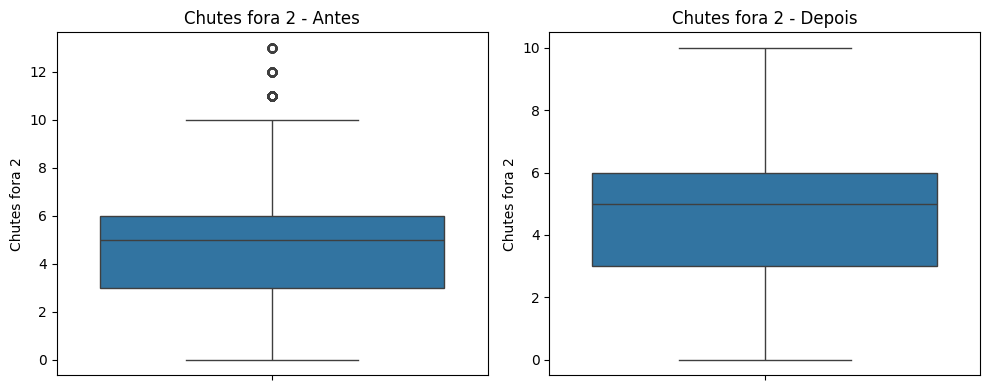

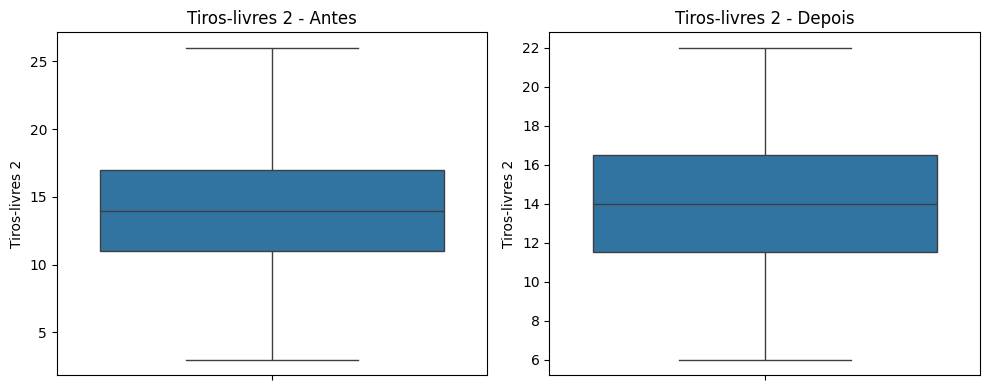

In [119]:
# Lista de colunas que você quer comparar
colunas_para_visualizar = ['Chutes fora 2', 'Tiros-livres 2']

# Cria os subplots
for col in colunas_para_visualizar:
    plt.figure(figsize=(10, 4))

    # Antes
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Antes')

    # Depois
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_copy[col])
    plt.title(f'{col} - Depois')

    plt.tight_layout()
    plt.show()


### Mudando o tipo de variável das colunas

Vamos codificar as colunas Position 1, Position 2, Time 1 e Time 2.

In [180]:
# Colunas não numéricas: Time e Position

times = np.union1d(df['Time 1'].dropna().unique(), df_copy['Time 2'].dropna().unique())
times_codigo = {times[i]: (i+1) for i in range(len(times))}
print("Total de Times = {}".format(len(times)))

posicoes = np.union1d(df['Position 1'].dropna().unique(), df['Position 2'].dropna().unique())
posicoes_codigo = {posicoes[i]: (i+1) for i in range(len(posicoes))}
print("Total de Formações = {}".format(len(posicoes)))

def insere_coluna_codificada(df, coluna, nome_coluna_codigo, dicionario_codificacao):
    if(nome_coluna_codigo not in df_copy.columns):
        df_copy.insert(df_copy.columns.get_loc( coluna )+1, nome_coluna_codigo, df_copy[ coluna ].map( dicionario_codificacao ))

# Cria o dataframe com as colunas não numéricas codificadas em novas
df_codificado = df_copy.copy()

insere_coluna_codificada(df_codificado, 'Position 1', 'Pos1_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Position 2', 'Pos2_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Time 1', 'Time1_codigo', times_codigo)
insere_coluna_codificada(df_codificado, 'Time 2', 'Time2_codigo', times_codigo)

df_codificado.head()

Total de Times = 310
Total de Formações = 30


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Gols 1,Gols 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time1_codigo,Time 2,Time2_codigo,Position 1,Pos1_codigo,Position 2,Pos2_codigo
6,4.0,3.0,0.0,1.0,4.0,4.0,7.0,5.0,9.0,12.0,0.0,2.0,0.0,0.0,16.0,13.0,18.0,18.0,2.0,1.0,1.0,0.0,2.0,3.0,34.0,66.0,Glasgow Rangers,119,Celtic,69,4-3-3,23.0,4-3-3,23.0
22,2.0,7.0,2.0,0.0,4.0,7.0,2.0,5.0,11.0,11.0,1.0,2.0,0.0,0.0,16.0,13.0,18.0,18.0,2.0,1.0,1.0,2.0,2.0,3.0,46.0,54.0,St. Mirren,259,Glasgow Rangers,119,4-2-3-1,23.0,4-3-3,23.0
23,4.0,8.0,2.0,4.0,4.0,8.0,2.0,5.0,15.0,9.0,2.0,1.0,0.0,0.0,16.0,13.0,18.0,18.0,2.0,1.0,1.0,3.0,2.0,3.0,41.0,59.0,Hibernian,134,Celtic,69,4-5-1,26.0,4-3-3,23.0
37,6.0,3.0,3.0,2.0,5.0,4.0,3.0,7.0,17.0,20.0,3.0,3.0,0.0,0.0,16.0,13.0,18.0,18.0,2.0,1.0,3.0,0.0,2.0,3.0,48.0,52.0,Dundee FC,86,Motherwell,191,4-4-1-1,24.0,4-3-3,23.0
47,5.0,5.0,2.0,1.0,4.0,6.0,0.0,4.0,13.0,15.0,1.0,3.0,0.0,0.0,16.0,13.0,18.0,18.0,2.0,1.0,3.0,2.0,2.0,3.0,55.0,45.0,Ross County,236,Dundee FC,86,4-2-3-1,20.0,4-3-3,23.0
